In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from data_analysis import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB")
from EAB_CB_data_analysis import *

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_77216/1375469573.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [3]:
c_d2,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0911 ancilla err meas expli CNOT FTXX13/d=2.txt")
print (circuit_count)

c_d8,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0911 ancilla err meas expli CNOT FTXX13/d=8.txt")
print (circuit_count)

c_d16,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0911 ancilla err meas expli CNOT FTXX13/d=16.txt")
print (circuit_count)

c_d32,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0911 ancilla err meas expli CNOT FTXX13/d=32.txt")
print (circuit_count)


20
20
20
20


In [4]:
paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 EAB FTXX13 d=2/"
paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 EAB FTXX13 d=8/"
paf_data_d16="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 EAB FTXX13 d=16/"
paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 EAB FTXX13 d=32/"

filenames_d2=read_data_file(paf_data_d2)
print (len(filenames_d2))
filenames_d4=[]
filenames_d8=read_data_file(paf_data_d8)
filenames_d16=read_data_file(paf_data_d16)
filenames_d32=read_data_file(paf_data_d32)

print (len(filenames_d8))
print (len(filenames_d16))
print (len(filenames_d32))

# filenames_d16_goodgates=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/good gates/")

20
.DS_Store
good gates
20
20
20


In [5]:
Set_Mapping([1,3,4,5,2])
nqubit=2
C=20

a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

spam1=SPAM_Operator(5)
spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/spam/spam.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0424/SPAM1/SPAM1.csv")


In [6]:
Set_Mapping([1,3,4,5,2])
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
shots=2000
counts=[]
counts_spam=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)
    
    # a_s=spam1.Correct_SPAM(a)
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])
        

2024-09-16-142634_Line_001.txt
counts: [40, 1292, 44, 21, 12, 103, 20, 4, 13, 345, 14, 17, 2, 62, 9, 2]
counts sim: [0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-142702_Line_002.txt
counts: [18, 16, 199, 14, 36, 6, 1433, 51, 3, 6, 27, 2, 21, 11, 151, 6]
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-142733_Line_003.txt
counts: [1, 2, 4, 26, 10, 19, 4, 142, 9, 13, 16, 194, 4, 55, 42, 1459]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-09-16-142804_Line_004.txt
counts: [4, 26, 8, 4, 16, 420, 21, 33, 11, 72, 9, 9, 41, 1268, 11, 47]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-16-142834_Line_005.txt
counts: [16, 56, 51, 1407, 27, 3, 10, 118, 9, 13, 9, 230, 8, 1, 3, 39]
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-142903_Line_006.txt
counts: [45, 1567, 32, 18, 13, 79, 23, 4, 12, 170, 7, 16, 2, 11, 1, 0]
counts sim: [0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2

In [7]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    # counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d8.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)

    # Display_States_Population(states=[sim_traced,data_traced,data_traced_spam],label=["sim_traced","data_traced","spam_traced"])

2024-09-16-144135_Line_001.txt
counts: [44, 5, 7, 23, 189, 15, 41, 11, 205, 17, 17, 29, 1234, 96, 54, 13]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-144223_Line_002.txt
counts: [39, 3, 8, 7, 373, 19, 46, 39, 112, 24, 18, 20, 1142, 51, 57, 42]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-144310_Line_003.txt
counts: [14, 8, 85, 4, 34, 44, 178, 13, 32, 35, 364, 16, 58, 36, 1021, 58]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-16-144400_Line_004.txt
counts: [26, 12, 376, 24, 61, 143, 1012, 67, 5, 12, 44, 6, 23, 61, 108, 20]
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-144450_Line_005.txt
counts: [288, 11, 44, 71, 88, 7, 14, 15, 1034, 35, 53, 107, 174, 9, 18, 32]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-144536_Line_006.txt
counts: [154, 12, 40, 59, 86, 9, 28, 28, 1012, 51, 49, 89, 302, 29, 19, 33]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000,

In [8]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d16.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced,data_traced_spam],label=["sim_traced","data_traced","spam_traced"])

2024-09-16-145136_Line_001.txt
counts: [253, 40, 39, 126, 675, 105, 73, 254, 58, 14, 19, 44, 126, 30, 29, 115]
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-145248_Line_002.txt
counts: [38, 213, 90, 33, 13, 50, 44, 12, 80, 692, 360, 68, 45, 131, 104, 27]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0]
2024-09-16-170026_Line_003.txt
counts: [114, 56, 69, 937, 99, 28, 25, 237, 57, 32, 21, 205, 28, 12, 12, 68]
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-145513_Line_004.txt
counts: [306, 24, 39, 93, 97, 20, 18, 81, 661, 49, 47, 147, 229, 41, 24, 124]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-150306_Line_005.txt
counts: [94, 20, 22, 41, 241, 20, 37, 110, 235, 36, 27, 108, 728, 50, 66, 165]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-150422_Line_006.txt
counts: [85, 36, 21, 83, 88, 30, 18, 137, 92, 39, 45, 334, 180, 89, 69, 654]
counts sim: [0, 0, 0, 0, 

In [9]:
filenames_data=[]
counts_d32=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-16-151340_Line_001.txt
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-151605_Line_002.txt
counts sim: [0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-151834_Line_003.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-152055_Line_004.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-152434_Line_005.txt
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-152657_Line_006.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0]
2024-09-16-152918_Line_007.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-16-153138_Line_008.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0]
2024-09-16-153511_Line_009.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0]
2024-09-16-153739_Line_010.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-16-154005_Line_011.txt
counts sim: [0, 0, 

In [10]:
import copy
from copy import copy, deepcopy

# copy.copy(x)
# copy.deepcopy(x)

# picklefile="c39b72eb-9de9-4338-b6ae-e478130a3f4fXX23541withpadding_set2"
with open("/Users/yzhu/yzhu_work/gates projects/EAB/circuits/0911 ancilla err meas expli CNOT FTXX13/03481c90-d355-4c90-b25b-aefbff22edccancilla_error_meas_expli_09112024", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)
#
C=20
eab_load_cpy=deepcopy(eab_load)
eab_load_cpy_spam=deepcopy(eab_load)
# eab_load_cpy_24=deepcopy(eab_load[0:20]) #a copy that only has depth=[2,4]


In [11]:
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()

for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])


In [23]:
# print (eab_load_cpy)
# filename = str(uuid.uuid4())
# filename+="FTXX13_mapping1345_R_0516_00+11_ExperimentalData"
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/13452 explicit CNOT FT R/results/"+filename, "wb") as fp:
#     pickle.dump(eab_load_cpy, fp)


In [12]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

print (eab_result)


{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.536, 0.773, 0.792, 0.468, 0.688, 0.781, 0.563, 0.807, 0.728, 0.634, 0.817, 0.73, 0.732, 0.575, 0.817, 0.797, 0.801, 0.782, 0.581, 0.829], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.665, 0.466, 0.62, 0.721, 0.462, 0.584, 0.254, 0.586, 0.678, 0.42, 0.423, 0.679, 0.416, 0.468, 0.694, 0.452, 0.394, 0.691, 0.494, 0.597], 16: [0.565, 0.507, 0.565, 0.322, 0.415, 0.502, 

Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.061216291608158446
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0471382 0.0031976
YI 0.0749508 0.0050276
ZI 0.0469838 0.0024163
IX 0.0426573 0.0026919
XX 0.0761288 0.00365
YX 0.0972525 0.0064171
ZX 0.0717201 0.0047811
IY 0.0695065 0.0049967
XY 0.0996772 0.006224
YY 0.0876146 0.0040602
ZY 0.0588556 0.0031173
IZ 0.0455949 0.0024738
XZ 0.0782969 0.004865
YZ 0.0633159 0.0033971
ZZ 0.0197674 0.0008316


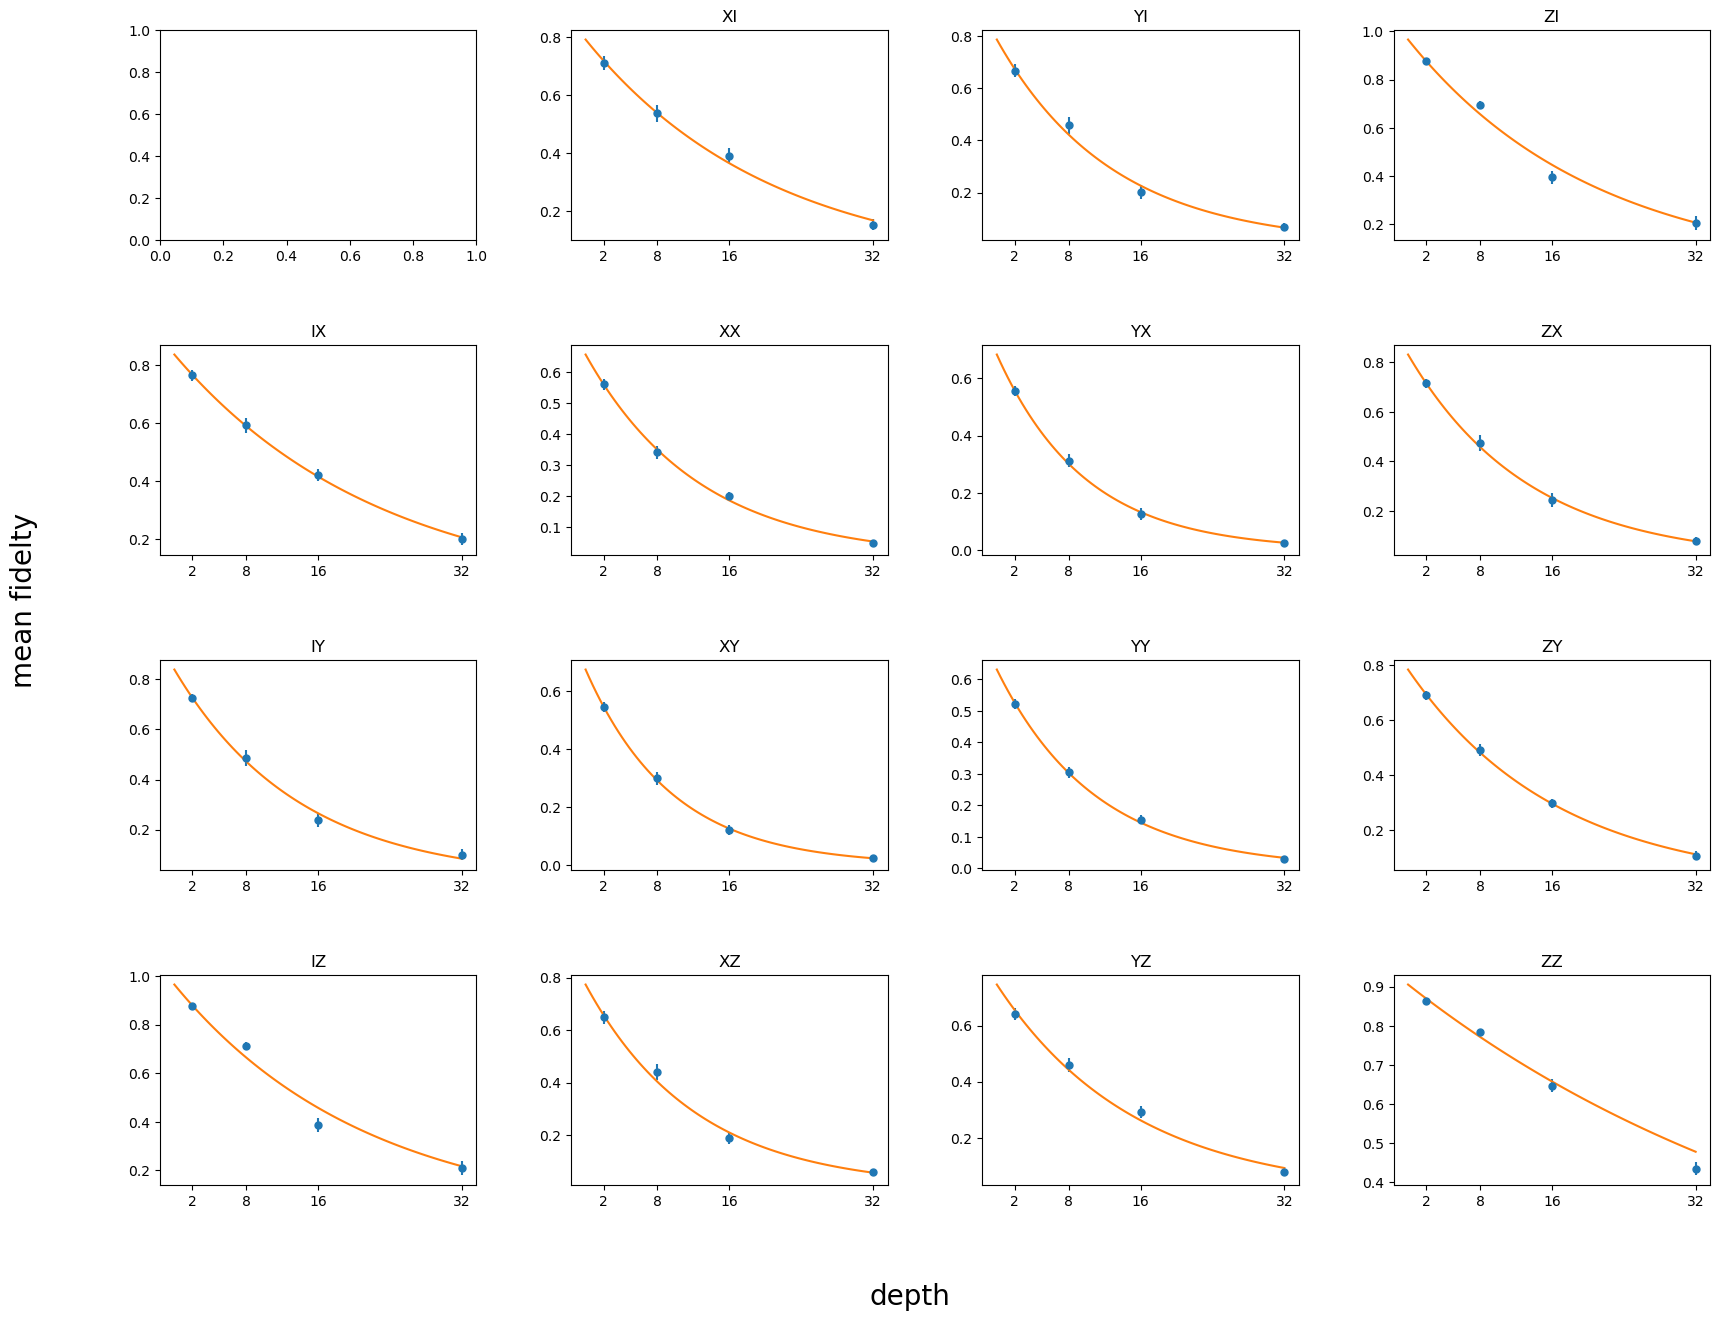

In [14]:
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
depth=[2,8,16,32]
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])

In [15]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9387837
XI 0.0038413
YI 0.0011047
ZI 0.0168306
IX 0.0041123
XX 0.0117816
YX 0.0022841
ZX -6.69e-05
IY 0.0006254
XY 0.0026691
YY 0.0014681
ZY -7.62e-05
IZ 0.0142103
XZ 0.0004072
YZ -6.41e-05
ZZ 0.0020889


# error mitigation : mitigate ancilla error 

In [23]:
pauli_fidelity_anc_square=np.load("II_fidelity.npy",allow_pickle=True)
pauli_fidelity_anc_square=pauli_fidelity_anc_square.item()
print (pauli_fidelity_anc_square)
mitigated_eab_fidelity = EAB_error_mitigation(fidelity_list,pauli_fidelity_anc_square)

{'II': 1.0, 'IX': 0.9443499680373942, 'IY': 0.9427435951866971, 'IZ': 0.9969898349453893, 'XI': 0.945567771837093, 'XX': 0.9078568263380252, 'XY': 0.9050737223507503, 'XZ': 0.9421886707579671, 'YI': 0.9471930459590788, 'YX': 0.9081727003132914, 'YY': 0.9054990996669611, 'YZ': 0.9436307002866238, 'ZI': 0.9974454005703773, 'ZX': 0.9429581847317584, 'ZY': 0.9414783818615449, 'ZZ': 0.9949061725255535}


In [24]:
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], mitigated_eab_fidelity[pauli_label])

II 1.0
XI 0.9805357044468441
YI 0.952725996220696
ZI 0.954453765413781
IX 0.9845121961852998
XX 0.9696226235074047
YX 0.9489084818784635
ZX 0.9563348908535586
IY 0.9560797090254924
XY 0.9447437887232752
YY 0.9588138660870481
ZY 0.9688470343236183
IZ 0.95562646250879
XZ 0.9491718015885795
YZ 0.9653570296696549
ZZ 0.9827387869444707


In [25]:
error_list = fidelity_to_error(mitigated_eab_fidelity,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))

Label / Pauli error rates
II 0.9642795
XI 0.003257
YI 0.0009735
ZI 0.0055446
IX 0.0041072
XX 0.0120239
YX 0.0021765
ZX -0.0001061
IY 0.0002455
XY 0.0025578
YY 0.0014065
ZY -0.0002245
IZ 0.0032967
XZ 0.0005003
YZ -0.0001223
ZZ 8.4e-05


In [26]:
# load 2023 05 FTXX 13 data
pathname="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/"
subdir="FTXX13_EAB_00+11_05162023"
possible_depths=["d248"]
alpha_detail_FTXX13_EAB={}
for dir in os.listdir(pathname):
    # print (os.listdir(pathname))
    if (dir.find(subdir)!=-1):
        # with open(pathname+subdir, "rb") as fp:   # Unpickling
        #     EAB_middleionidle_alpha_detail_d28 = pickle.load(fp)
        # print ("here")
        for file in os.listdir(pathname+subdir+"/"):
            filename = os.fsdecode(file)
            for depth in possible_depths:
                if (filename.find(depth)!=-1):
                    with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                        alpha_detail_FTXX13_EAB["alpha_detail_"+depth]=pickle.load(fp)
                        # print ("loaded")
                else:
                    continue
    else:
        continue




#Full set EAB FTXX45 middle ion idle 03052024 using new FTXX45 solution
pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="FTXX45 middleionidle 0305"
possible_depths=["d281632"]
alpha_detail_FTXX45_NewSolution_0305_EAB={}
alpha_detail_FTXX45_NewSolution_0305_EAB_errorbar={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        alpha_detail_FTXX45_NewSolution_0305_EAB_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_NewSolution_0305_EAB_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue

# 05/14-05/16/2024 full set of CB data for FTXX45 (05142024 solution) d=[2,8,16,32]
pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="CB_FTXX45_052024"
possible_depths=["d281632"]
alpha_detail_FTXX45_0514Solution_05162024_CB={}
alpha_detail_FTXX45_0514Solution_05162024_CB_errorbar={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        alpha_detail_FTXX45_0514Solution_05162024_CB_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_0514Solution_05162024_CB_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue


found
alpha_error_detail_d281632
alpha_detail_d81632
alpha_detail_d2816
alpha_error_detail_d81632
alpha_detail_d281632
alpha_error_detail_d2816
found
CB_alpha_detail_d281632_error
CB_alpha_detail_d81632
.DS_Store
CB_alpha_detail_d2816
CB_alpha_detail_d281632
CB_alpha_detail_d81632_error
CB_alpha_detail_d2816_error


In [27]:
# print (alpha_detail_FTXX13_EAB)
print(CB_alpha_detail_d2832)

NameError: name 'CB_alpha_detail_d2832' is not defined

In [30]:
sns.color_palette("PRGn",10)

[(0.44198385236447524, 0.14855824682814303, 0.4921953094963475),
 (0.5730872741253364, 0.3853902345251826, 0.639830834294502),
 (0.7134948096885813, 0.5859284890426758, 0.7702422145328719),
 (0.8546712802768166, 0.766320645905421, 0.87520184544406),
 (0.9403306420607459, 0.906728181468666, 0.9420991926182237),
 (0.9155709342560554, 0.956247597078047, 0.904959630911188),
 (0.7803921568627453, 0.9121107266435987, 0.7568627450980394),
 (0.5633217993079587, 0.8069204152249136, 0.5547866205305654),
 (0.3044982698961938, 0.6408304498269897, 0.3480968858131488),
 (0.09550173010380622, 0.45059592464436754, 0.20492118415993849)]

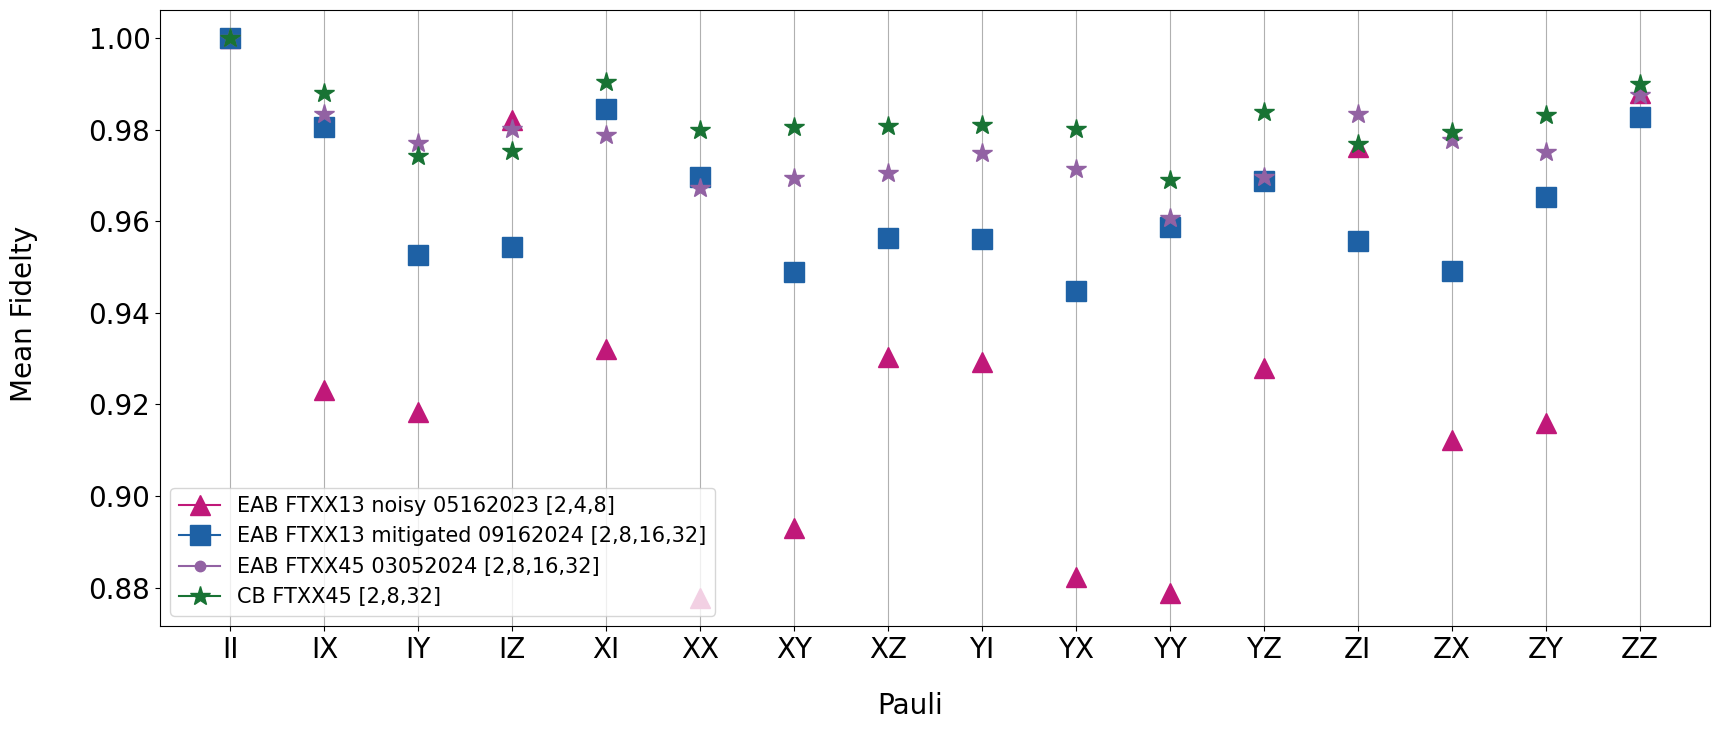

In [29]:
##plot  alpha_detail vs. depth
import seaborn as sns
from matplotlib.lines import Line2D
nqubit=2
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full
# CB_pauli_request_list=["IX","XI","XX"] #since CB circuits were generated incorrectedly, the rest of the pauli channels can't be calculated
pal = sns.color_palette("PRGn",10)
pal1 = sns.color_palette("PiYG",10)
pal2 = sns.color_palette("RdBu",10)

fig=plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 20})
fig.text(0.5, 0.0, 'Pauli', ha='center')
fig.text(0.05, 0.5, 'Mean Fidelty', va='center', rotation='vertical')

plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX13_EAB["alpha_detail_d248"][pauli_label]) for pauli_label in pauli_request_list],"^",color=pal1[0],markersize=15,label='FTXX13 05162023')
plt.plot(pauli_request_list,[mitigated_eab_fidelity[pauli_label] for pauli_label in pauli_request_list],"s",color=pal2[9],markersize=15,label='FTXX13 mitigated 0916 2024')
plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[1],markersize=15,label='EAB FTXX45 03052024')
# plt.plot(pauli_request_list,[np.mean(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[7],markersize=15,label='CB FTXX23 ')
plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 052024')
plt.grid(axis="x")

legend_elements = [
        
                   Line2D([0], [0], marker='^', color=pal1[0], label='EAB FTXX13 noisy 05162023 [2,4,8]',markerfacecolor=pal1[0], markersize=15), # 0305 new solution middle ion idle
                   Line2D([0], [0], marker='s', color=pal2[9], label='EAB FTXX13 mitigated 09162024 [2,8,16,32]',markerfacecolor=pal2[9], markersize=15) ,  
                   Line2D([0], [0], marker='.', color=pal[1], label='EAB FTXX45 03052024 [2,8,16,32]',markerfacecolor=pal[1], markersize=15),  
                #    Line2D([0], [0], marker='*', color=pal[7], label='CB FTXX23 [2,8,32]',markerfacecolor=pal[7], markersize=15),
                   Line2D([0], [0], marker='*', color=pal[9], label='CB FTXX45 [2,8,32]',markerfacecolor=pal[9], markersize=15)
                    
                  ]

plt.legend(handles=legend_elements, loc='lower left',fontsize=15)
# fname="comparison.pdf"
fidelity_list={}
stdev_list={}
# list_alpha_details=[alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_d281632"]]

# ##plot  pauli error rate of selected experiments
# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         fidelity_list[pauli_label] = 1.0
#         stdev_list[pauli_label] = 0.0
#     else:
#         fidelity_list[pauli_label] = mean(list_alpha_details[0][pauli_label]) #pauli fidelity from fit
#         stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
#         a_full_dic[pauli_label]=a 
#         Y_full_dic[pauli_label]=Y
#         Yerr_full_dic[pauli_label]=Yerr

# fname="./plots/CB&EABcomparison.png"
# plt.savefig(fname,transparent=None, dpi='figure', format='png')